In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import torch

In [2]:
fashion_mnist=fetch_openml(name='Fashion-MNIST', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
fashion_mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
labels_map={
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [5]:
X=fashion_mnist.data
y=fashion_mnist.target
y[0]

'9'

In [6]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
        13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,
         0.,   0.,   1.,   3.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
y=y.astype(np.int8)
y

array([9, 0, 0, ..., 8, 1, 5], dtype=int8)

In [8]:
# 데이터 정규화
X=X/255
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

레이블 :  9


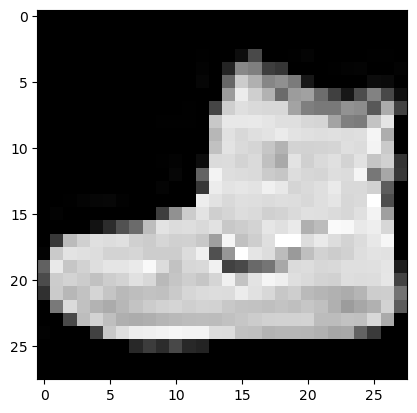

In [9]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print('레이블 : ', y[0])

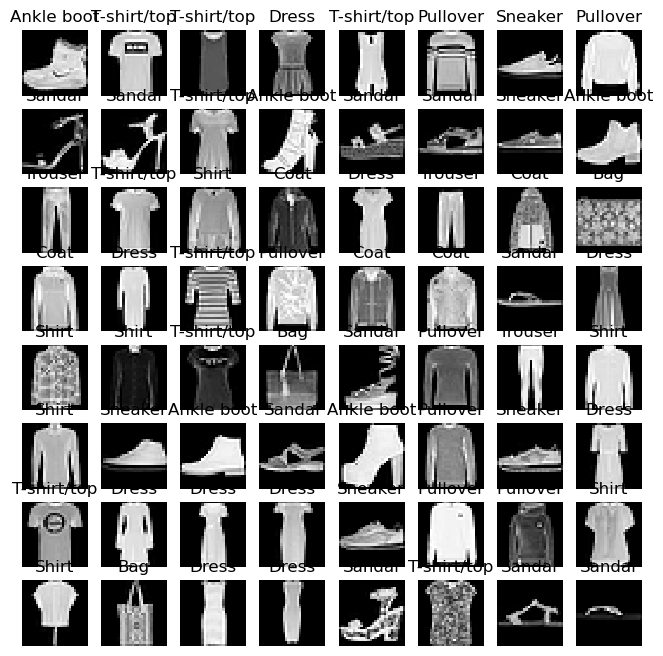

In [13]:
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.axis('off') #축없애기
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.title(labels_map[y[i]])
plt.show()

In [14]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [15]:
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/7, random_state=0)

X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784]) torch.Size([60000]) torch.Size([10000])


In [17]:
ds_train=TensorDataset(X_train, y_train)
ds_test=TensorDataset(X_test, y_test)

In [18]:
loader_train=DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [19]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [20]:
from torch import optim
loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(model.parameters(), lr=0.01)

In [21]:
costs, accuracys, epochs=[],[],[]

In [22]:
# 트레이닝 함수
def train(epoch):
    model.train() #모델을 훈련시킨다
    cost=0
    accuracy=0

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs=model(data)
        loss=loss_fn(outputs, targets)

        _, y_hat=torch.max(outputs.data,1) #최대값을 찾아서 인덱스와 y_hat으로 출력
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum() # 찾은 정답과 실제 정답만 찾아서 더해준다
        cost+=loss.item()
        loss.backward()
        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print('epoch{}:cost={}, Accuracy={}\n'.format(epoch, cost, accuracy/60000))

In [23]:
def test():
    model.eval() # 신경망을 추론(예측) 모드로 전환
    correct=0

    with torch.no_grad() : #추론(예측)과정에서 미분을 하지 않게 해줌
        for data, targets in loader_test:
            outputs=model(data)
            _, prodicted=torch.max(outputs.data,1)
            correct +=prodicted.eq(targets.data.view_as(prodicted)).sum()
    data_num=len(loader_test.dataset)
    print("\n테스트 데이터에서 예측 정확도:{}/{}({:.2f}%)\n".format(correct,data_num, 100.*correct/data_num))        

In [24]:
test()


테스트 데이터에서 예측 정확도:1142/10000(11.42%)



In [25]:
for epoch in range(10):
    train(epoch)
test()    

epoch0:cost=491.8187193572521, Accuracy=0.8076833486557007

epoch1:cost=393.03923469781876, Accuracy=0.847350001335144

epoch2:cost=375.846973285079, Accuracy=0.8557999730110168

epoch3:cost=357.5944482088089, Accuracy=0.8613166809082031

epoch4:cost=349.9005172252655, Accuracy=0.8668833374977112

epoch5:cost=342.70960322767496, Accuracy=0.8684499859809875

epoch6:cost=331.494946859777, Accuracy=0.8736333250999451

epoch7:cost=329.563106931746, Accuracy=0.8747000098228455

epoch8:cost=325.57995684444904, Accuracy=0.8760833144187927

epoch9:cost=313.78965996205807, Accuracy=0.879966676235199


테스트 데이터에서 예측 정확도:8704/10000(87.04%)



o: tensor([-27.9735, -31.8818, -25.6915, -22.0043, -25.3972,   2.3251, -27.9160,
          7.8428,  -7.9875,  -2.3054], grad_fn=<AddBackward0>)
pred: torch.return_types.max(
values=tensor(7.8428),
indices=tensor(7))
predicted: tensor(7)
예측 결과 : Sneaker


<function matplotlib.pyplot.show(close=None, block=None)>

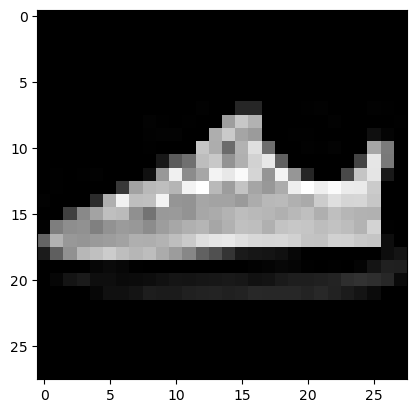

In [27]:
index=100
model.eval()
data=X_test[index]
output=model(data)
print("o:", output)
pred=torch.max(output.data, 0)
print('pred:', pred)
_, predicted=torch.max(output.data, 0) #확률이 가장 높은 레이블이 무엇인지 계산
print("predicted:", predicted)
predicted=predicted.item()
predicted_label = labels_map[predicted]
print("예측 결과 : {}".format(predicted_label))

X_test_show=(X_test[index]).numpy()

plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show

In [ ]:
predictions=model(X_test)
predicted=[]
for i in range(len(predictions)):
    v, idx=torch.max(predictions[i],0)
    # predicted.append(idx) -> tensor로 쌓여있다
    predicted.append(idx.item())
predicted=torch.from_numpy(np.array(predicted))
print(predicted)
print(y_test)

tensor([9, 5, 6,  ..., 6, 9, 4], dtype=torch.int32)
tensor([9, 5, 6,  ..., 6, 9, 4])


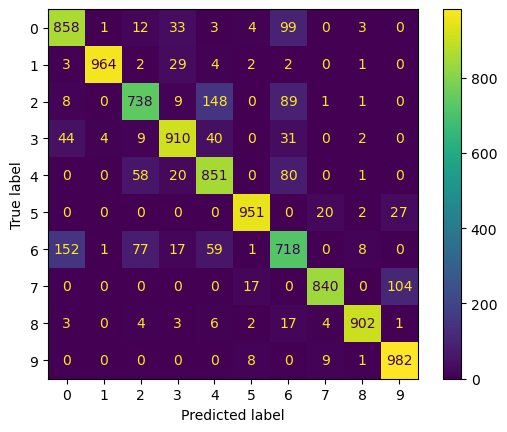

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(cm).plot()

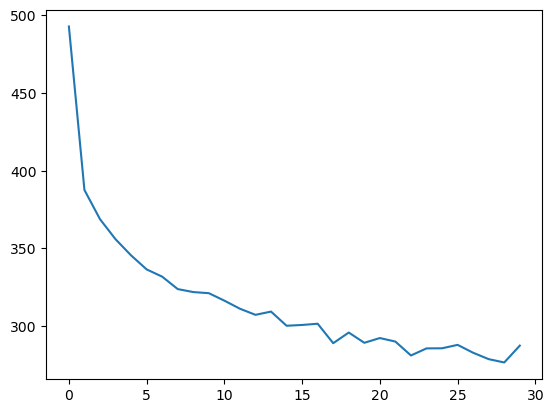

In [ ]:
plt.plot(costs)

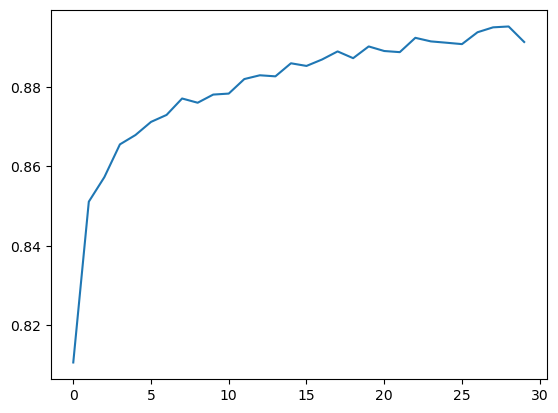

In [ ]:
plt.plot(accuracys)